# Analisis de Circuitos - TP

https://dynamics-and-control.readthedocs.io/en/latest/1_Dynamics/3_Linear_systems/Laplace%20transforms.html

https://www.tutorialspoint.com/sympy/sympy_derivative.htm

https://jckantor.github.io/CBE30338/05.03-Creating-Bode-Plots.html

## Transferencia

La función de transferencia que me tocó es

$$
H(s)=\frac{s^2}{s^2+2666*s+3.553*10^6}
$$

In [3]:
import sympy
import matplotlib.pyplot as plt
import numpy as np

t, s = sympy.symbols('t, s', positive=True)

def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

h = (s**2) / (s**2 + 2666*s + 3553000)
h

s**2/(s**2 + 2666*s + 3553000)

## Respuesta al escalon

La respuestá del escalón está definida como

$$
f_{escalon}(t)=L^{-1}\Big \{ \frac{H(s)}{s} \Big \}
$$

In [4]:
rta_escalon = invL(h/s)
rta_escalon

(-1333*sqrt(1776111)*sin(sqrt(1776111)*t) + 1776111*cos(sqrt(1776111)*t))*exp(-1333*t)/1776111

In [5]:
def plot(func):
    x = np.linspace(0,4,100)

    lam_x = sympy.lambdify(t, func, modules=['numpy'])

    #lam_x(x)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['bottom'].set_position('zero')
    # plot the function
    plt.plot(x,lam_x(x/1000), 'r')

    # show the plot
    plt.show()

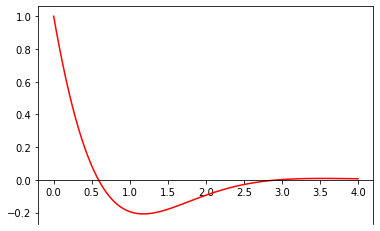

In [6]:
plot(rta_escalon)

## Respuesta al Impulso
La respueta al impulso está dada por

$$
f_{impulso} = L^{-1} \Big \{ H(s) \Big \}
$$

Sin embargo calcular la inversa de $H(s)$ por métodos numéricos falla, por lo que usaremos la siguiente propiedad

$$
\frac{df}{dt} = L^{-1} \Big \{ sF(s)-f(0^-) \Big \}
$$

por lo que teniendo

$$
f_{escalon}(t)=L^{-1}\Big \{ \frac{H(s)}{s} \Big \}
$$

puedo decir que

$$
f_{impulso}(t) = \frac{df_{escalon}(t)}{dt}
$$

In [7]:
rta_impulso = sympy.diff(rta_escalon, t)
rta_impulso

(-sqrt(1776111)*sin(sqrt(1776111)*t) - 1333*cos(sqrt(1776111)*t))*exp(-1333*t) - 1333*(-1333*sqrt(1776111)*sin(sqrt(1776111)*t)/1776111 + cos(sqrt(1776111)*t))*exp(-1333*t)

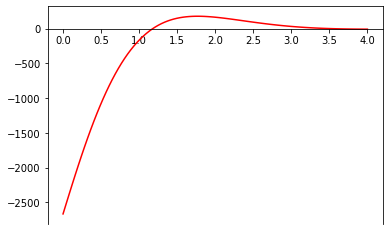

In [10]:
plot(rta_impulso)

## Transferencia Real

In [13]:
h_real = (s**2) / (s**2 + 2673.51*s + 3559000)
h_real

s**2/(s**2 + 2673.51*s + 3559000)

### Respuesta al escalon

In [14]:
rta_escalon_real = invL(h_real/s)
rta_escalon_real

1.0*(-1.00417501483518*sin(1331.19723180865*t) + 1.0*cos(1331.19723180865*t))*exp(-1336.755*t)

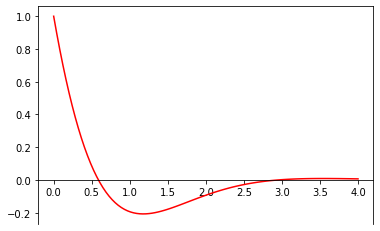

In [15]:
plot(rta_escalon_real)

### Respuesta al impulso

In [16]:
rta_impulso_real = sympy.diff(rta_escalon_real, t)
rta_impulso_real

(-1331.19723180865*sin(1331.19723180865*t) - 1336.755*cos(1331.19723180865*t))*exp(-1336.755*t) - 1336.755*(-1.00417501483518*sin(1331.19723180865*t) + 1.0*cos(1331.19723180865*t))*exp(-1336.755*t)

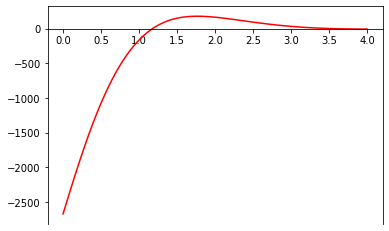

In [17]:
plot(rta_impulso_real)

In [30]:
sp = sympy
def aux(eq):
    top, bot = [[float(i) for i in sp.Poly(i, s).all_coeffs()] for i in eq.as_numer_denom()]
    return top, bot


In [31]:
aux(h_real)

([1.0, 0.0, 0.0], [1.0, 2673.51, 3559000.0])

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import control

import warnings
warnings.filterwarnings('ignore')


In [33]:
G = control.tf(*aux(h_real))
print(G)


          s^2
------------------------
s^2 + 2674 s + 3.559e+06



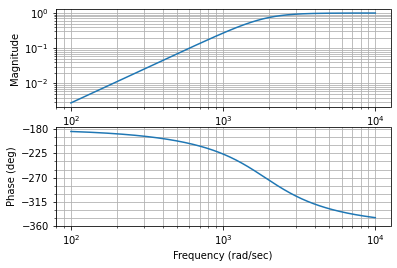

In [34]:
mag,phase,omega = control.bode(G)